In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function, division
from builtins import range, input

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings



/Users/mahesh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
covid="CT/COVID"
non_covid="CT/Non-COVID"
cov_img=[]
cov_label=[]
noncov_img=[]
noncov_label=[]

def load_images(pth):
   image_paths = glob.glob(f"{pth}/*.jpg") + glob.glob(f"{pth}/*.jpeg")
   images = []
   for img_path in image_paths:
        img = cv2.imread(img_path)  
        img = cv2.resize(img, (224, 224))  
        img = img.astype('float32') / 255.0 
        images.append(img)
   return images


cov_img=load_images(covid)
noncov_img=load_images(non_covid)

cov_label=[1]*len(cov_img)
noncov_label=[0]*len(noncov_img)


    



In [3]:
print(f"Total COVID images: {len(cov_img)}, Total Non-COVID images: {len(noncov_img)}")
print(f"Total COVID labels: {len(cov_label)}, Total Non-COVID label: {len(noncov_label)}")

Total COVID images: 80, Total Non-COVID images: 203
Total COVID labels: 80, Total Non-COVID label: 203


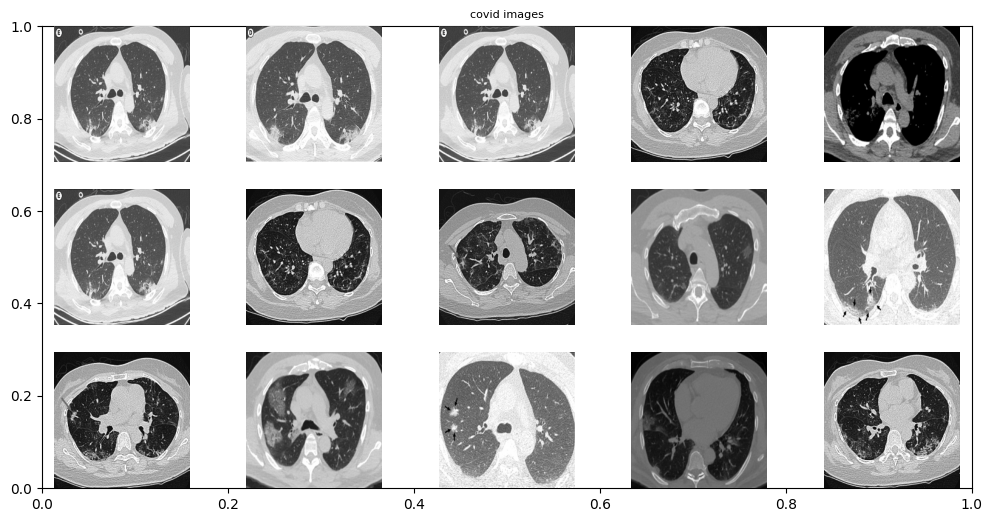

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("covid images",fontsize=8)

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(cov_img[i])
    plt.axis('off')
plt.show()

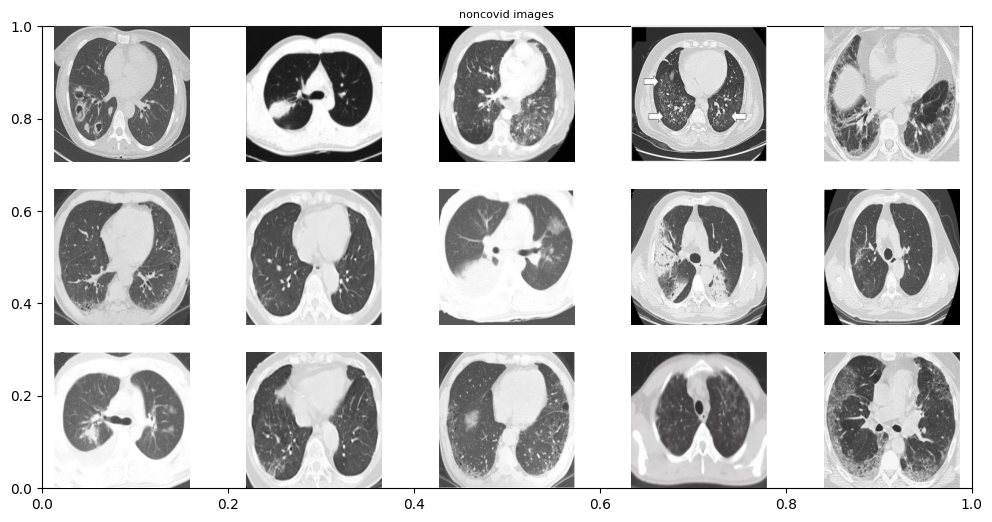

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("noncovid images",fontsize=8)

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(noncov_img[i])
    plt.axis('off')
plt.show()

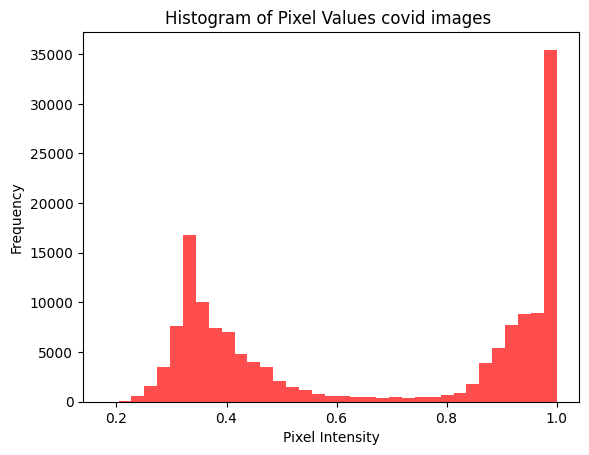

In [6]:
import random
import matplotlib.pyplot as plt

def histogram(images):
    index = random.randint(0, len(images) - 1)  
    image = images[index]  

    pix = image.flatten()  

    plt.hist(pix, bins=35, color='red', alpha=0.7)
    plt.title('Histogram of Pixel Values covid images ')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
histogram(cov_img)

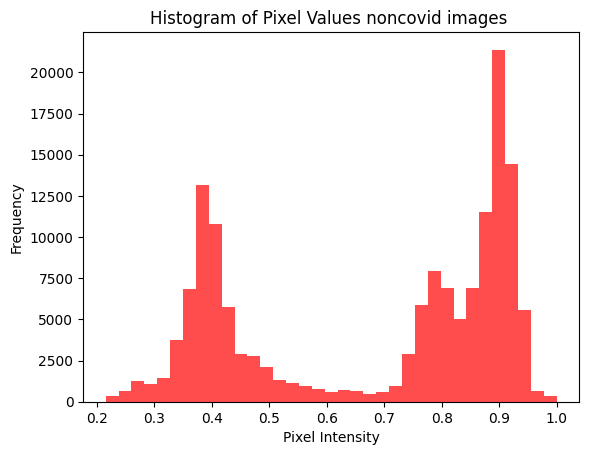

In [7]:
import random
import matplotlib.pyplot as plt

def histogram(images):
    index = random.randint(0, len(images) - 1)  
    image = images[index]  

    pix = image.flatten()  

    plt.hist(pix, bins=35, color='red', alpha=0.7)
    plt.title('Histogram of Pixel Values noncovid images ')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
histogram(noncov_img)

In [8]:

from tensorflow.keras.utils import to_categorical
images=np.array(cov_img + noncov_img)
labels=np.array(cov_label + noncov_label)
labels = to_categorical(labels, num_classes=2)

print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")



Total images: 283
Total labels: 283


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(226, 224, 224, 3)
(57, 224, 224, 3)
(226, 2)
(57, 2)


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import Model
import numpy as np

# Input layer
inputs = Input(shape=(224, 224, 3))

# First block
x = Conv2D(64, kernel_size=3, padding='same', activation='relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(64, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

# Second block
x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

# Third block
x = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(256, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

# Fourth block
x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

# Fifth block
x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(512, kernel_size=3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=2, strides=2, padding='same')(x)

# Flatten and fully connected layers
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation='softmax')(x)

# Model compilation
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Model training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=16)



Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 108s 7s/step - accuracy: 0.6136 - loss: 3.8696 - val_accuracy: 0.6842 - val_loss: 0.6966
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 94s 6s/step - accuracy: 0.8323 - loss: 1.4044 - val_accuracy: 0.6842 - val_loss: 1.2495
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - accuracy: 0.8892 - loss: 0.9561 - val_accuracy: 0.6842 - val_loss: 1.7549
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 99s 7s/step - accuracy: 0.8650 - loss: 0.9021 - val_accuracy: 0.6842 - val_loss: 4.6513
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 108s 7s/step - accuracy: 0.8411 - loss: 1.2355 - val_accuracy: 0.6842 - val_loss: 7.8316
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 106s 7s/step - accuracy: 0.8993 - loss: 1.0707 - val_accuracy: 0.6842 - val_loss: 11.3077
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.9075 - loss: 0.7927 - val_accuracy: 0.6842 - val_loss: 14.9810
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 109s 7s/step - accuracy: 0.9037 - loss: 0.7276 - val_accuracy: 0.6842 - va

In [11]:
model.save('vgg_ct1.h5')


In [12]:
model = load_model('vgg_ct1.h5')

In [13]:
y_pred = model.predict(X_test, batch_size=32)

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step


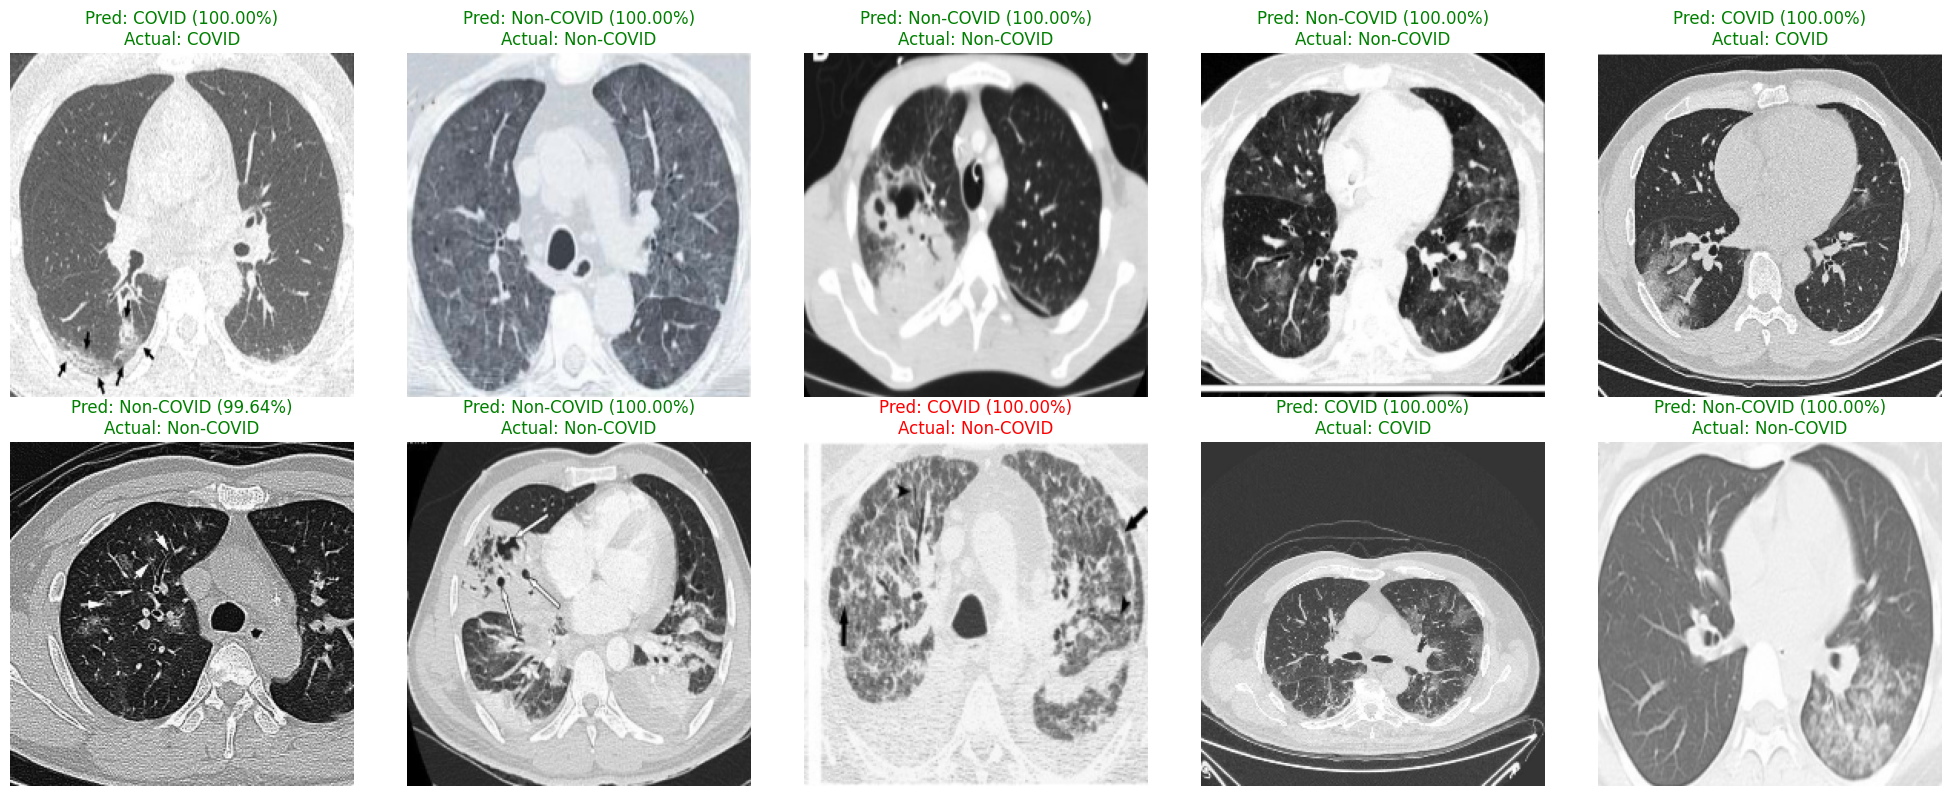

In [14]:
import matplotlib.pyplot as plt
import numpy as np

predictions = y_pred[0:10]
actuals = y_test[0:10]  

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for index, (probability, actual, ax) in enumerate(zip(predictions, actuals, axes)):
    predicted_label = np.argmax(probability)
    actual_label = np.argmax(actual)
    prob_covid = probability[1] * 100
    prob_noncovid = (1 - probability[1]) * 100
    
  
    color = 'green' if predicted_label == actual_label else 'red'
    
    if prob_covid > 50:
        title = f'COVID ({prob_covid:.2f}%)'
    else:
        title = f'Non-COVID ({prob_noncovid:.2f}%)'
    
    ax.imshow(X_test[index])
    ax.set_title(f'Pred: {title}\nActual: {"COVID" if actual_label == 1 else "Non-COVID"}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()


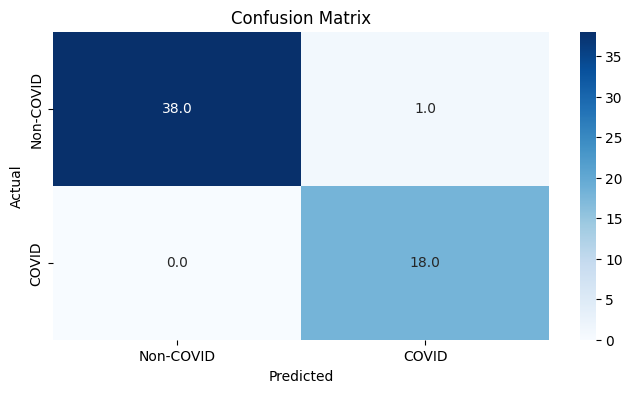

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
import seaborn as sns

pred_y=np.argmax(y_pred,axis=1)
true_y=np.argmax(y_test,axis=1)
confusion_mat = confusion_matrix(true_y,pred_y)
plt.figure(figsize=(8,4))
sns.heatmap(confusion_mat, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
accuarcy=accuracy_score(true_y,pred_y)
print(f'accuracy of the model: {accuarcy * 100:.2f}')

accuracy of the model: 98.25


In [18]:
rpt=classification_report(true_y,pred_y,target_names=['Non_COVID','COVID'])
print(rpt)


              precision    recall  f1-score   support

   Non_COVID       1.00      0.97      0.99        39
       COVID       0.95      1.00      0.97        18

    accuracy                           0.98        57
   macro avg       0.97      0.99      0.98        57
weighted avg       0.98      0.98      0.98        57



2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


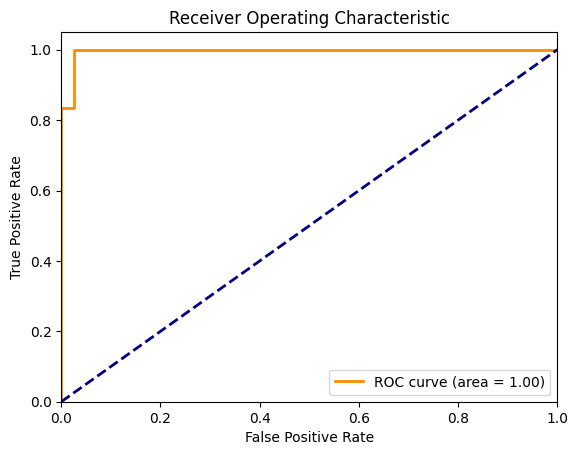

In [19]:
# ROC Curve
y_pred_prob = model.predict(X_test, batch_size=32)
true_y = np.argmax(y_test, axis=1)
pred_y = np.argmax(y_pred_prob, axis=1)

fpr, tpr, _ = roc_curve(true_y, y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


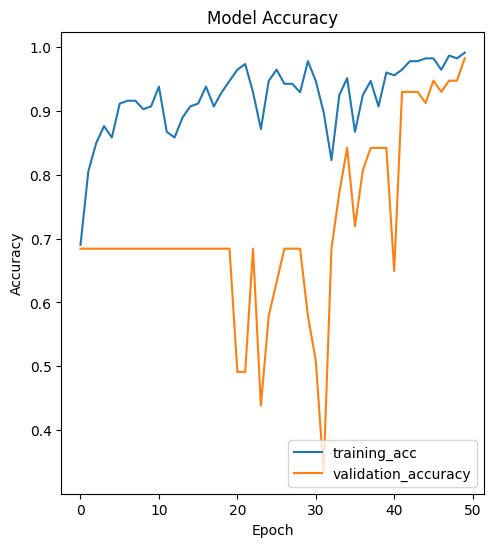

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training_acc')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

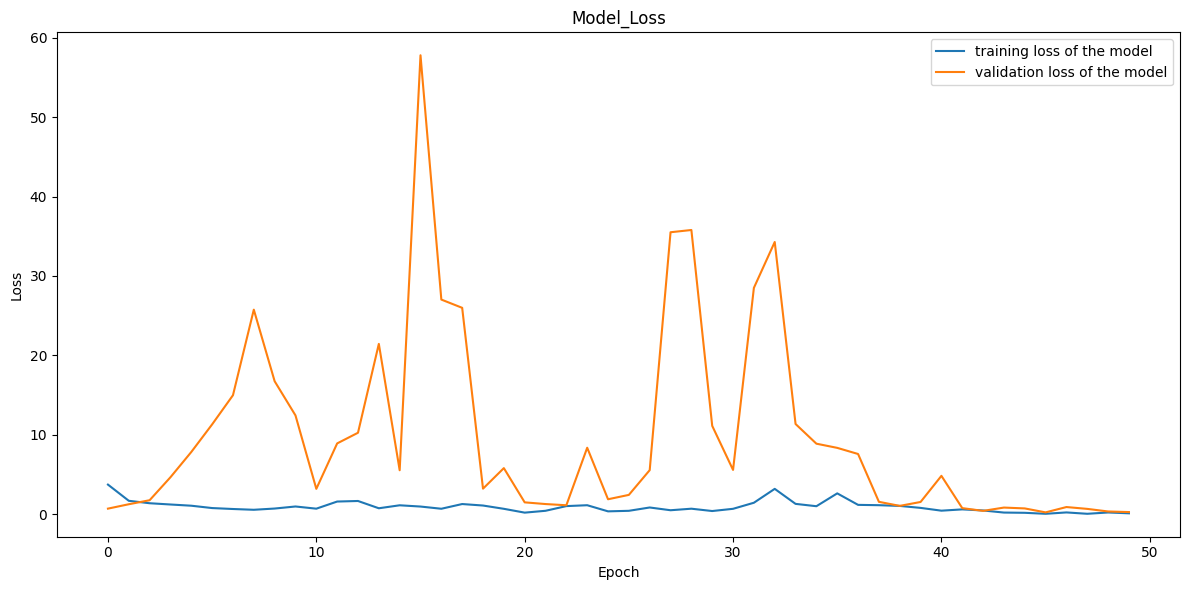

In [21]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='training loss of the model')
plt.plot(history.history['val_loss'], label='validation loss of the model')
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [22]:
#### RESNET ARCHITECTURE 



In [23]:
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


covid = "CT/COVID"
non_covid = "CT/Non-COVID"

cov_img = []
cov_label = []
noncov_img = []
noncov_label = []

def load_images(pth):
    image_paths = glob.glob(f"{pth}/*.jpg") + glob.glob(f"{pth}/*.jpeg")
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        img = img.astype('float32') / 255.0  
        images.append(img)
    return images

cov_img = load_images(covid)
noncov_img = load_images(non_covid)

cov_label = [1] * len(cov_img)
noncov_label = [0] * len(noncov_img)


images = np.array(cov_img + noncov_img)
labels = np.array(cov_label + noncov_label)
labels = to_categorical(labels, num_classes=2)


print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


   

Total images: 283
Total labels: 283
(226, 224, 224, 3)
(57, 224, 224, 3)
(226, 2)
(57, 2)


In [24]:
def build_resnet_model(input_shape=(224, 224, 3), num_classes=2, dropout_rate=0.5, trainable=False):
    base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=input_shape))
    x = base_model.output
    x = Flatten(name="flatten_layer")(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(num_classes, activation="softmax")(x)
    custom_model = Model(inputs=base_model.input, outputs=x)

    for layer in base_model.layers:
        layer.trainable = trainable

    custom_model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    return custom_model


def get_data_augmentation():
    data_augmentation = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )
    return data_augmentation


modell = build_resnet_model()
data_gen = get_data_augmentation()


In [25]:
modell.summary()




Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,788,418 (90.75 MB)

 Trainable params: 200,706 (784.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [26]:
train_gen = data_gen.flow(X_train, y_train, batch_size=32)

historyy = modell.fit(
    train_gen,
    steps_per_epoch=len(X_train) // 32,
    epochs=100,
    validation_data=(X_test, y_test)
)

Epoch 1/100


/Users/mahesh/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5689 - loss: 3.1604 - val_accuracy: 0.6667 - val_loss: 1.6786
Epoch 2/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7500 - loss: 1.5605

2024-11-03 17:05:30.824895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.7500 - loss: 1.5605 - val_accuracy: 0.6667 - val_loss: 1.9834
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7271 - loss: 1.6504 - val_accuracy: 0.8421 - val_loss: 0.6942
Epoch 4/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8125 - loss: 0.6603

2024-11-03 17:05:43.114225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.8125 - loss: 0.6603 - val_accuracy: 0.8421 - val_loss: 0.7926
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7715 - loss: 0.9421 - val_accuracy: 0.7193 - val_loss: 1.3153
Epoch 6/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8750 - loss: 0.4168

2024-11-03 17:05:55.471612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 320ms/step - accuracy: 0.8750 - loss: 0.4168 - val_accuracy: 0.7719 - val_loss: 1.1674
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7266 - loss: 0.7752 - val_accuracy: 0.7719 - val_loss: 0.8308
Epoch 8/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8125 - loss: 0.5263

2024-11-03 17:06:07.629597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.8125 - loss: 0.5263 - val_accuracy: 0.7719 - val_loss: 0.8573
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8288 - loss: 0.5938 - val_accuracy: 0.7895 - val_loss: 0.7839
Epoch 10/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8438 - loss: 0.3428

2024-11-03 17:06:22.169859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 0.8438 - loss: 0.3428 - val_accuracy: 0.7895 - val_loss: 0.8111
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8076 - loss: 0.5321 - val_accuracy: 0.7719 - val_loss: 0.9945
Epoch 12/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7500 - loss: 0.8944

2024-11-03 17:06:36.276325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step - accuracy: 0.7500 - loss: 0.8944 - val_accuracy: 0.7719 - val_loss: 0.8608
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8528 - loss: 0.4721 - val_accuracy: 0.5439 - val_loss: 1.7211
Epoch 14/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5938 - loss: 1.5606

2024-11-03 17:06:48.800246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 339ms/step - accuracy: 0.5938 - loss: 1.5606 - val_accuracy: 0.6667 - val_loss: 1.2146
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8308 - loss: 0.5103 - val_accuracy: 0.3860 - val_loss: 2.7698
Epoch 16/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.4375 - loss: 1.6074

2024-11-03 17:07:03.177620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.4375 - loss: 1.6074 - val_accuracy: 0.6491 - val_loss: 1.3649
Epoch 17/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7531 - loss: 1.2653 - val_accuracy: 0.6140 - val_loss: 1.7658
Epoch 18/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7500 - loss: 0.8920

2024-11-03 17:07:16.069496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.7500 - loss: 0.8920 - val_accuracy: 0.3333 - val_loss: 4.4091
Epoch 19/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4877 - loss: 2.5800 - val_accuracy: 0.7544 - val_loss: 1.5442
Epoch 20/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 960ms/step - accuracy: 0.8125 - loss: 2.1511

2024-11-03 17:07:27.825025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - accuracy: 0.8125 - loss: 2.1511 - val_accuracy: 0.8772 - val_loss: 1.2002
Epoch 21/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7686 - loss: 1.0063 - val_accuracy: 0.8772 - val_loss: 1.3317
Epoch 22/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 948ms/step - accuracy: 0.8125 - loss: 1.6041

2024-11-03 17:07:38.907394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - accuracy: 0.8125 - loss: 1.6041 - val_accuracy: 0.8421 - val_loss: 1.4876
Epoch 23/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8114 - loss: 1.5736 - val_accuracy: 0.4386 - val_loss: 4.1935
Epoch 24/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5312 - loss: 2.5086

2024-11-03 17:07:50.720481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.5312 - loss: 2.5086 - val_accuracy: 0.6140 - val_loss: 3.2146
Epoch 25/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.6612 - loss: 1.7067 - val_accuracy: 0.7895 - val_loss: 1.6595
Epoch 26/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9062 - loss: 0.3311

2024-11-03 17:08:03.703762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.9062 - loss: 0.3311 - val_accuracy: 0.7719 - val_loss: 2.2499
Epoch 27/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7940 - loss: 0.9747 - val_accuracy: 0.8421 - val_loss: 1.5699
Epoch 28/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8438 - loss: 0.9043

2024-11-03 17:08:15.191583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - accuracy: 0.8438 - loss: 0.9043 - val_accuracy: 0.8772 - val_loss: 1.5219
Epoch 29/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8544 - loss: 1.0345 - val_accuracy: 0.7719 - val_loss: 1.9532
Epoch 30/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 939ms/step - accuracy: 0.8438 - loss: 0.2620

2024-11-03 17:08:26.122413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - accuracy: 0.8438 - loss: 0.2620 - val_accuracy: 0.7719 - val_loss: 1.8195
Epoch 31/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7961 - loss: 1.1019 - val_accuracy: 0.8947 - val_loss: 1.3996
Epoch 32/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - accuracy: 0.8125 - loss: 1.3259

2024-11-03 17:08:37.096074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.8125 - loss: 1.3259 - val_accuracy: 0.8596 - val_loss: 1.4120
Epoch 33/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8448 - loss: 0.7887 - val_accuracy: 0.7719 - val_loss: 1.6730
Epoch 34/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 989ms/step - accuracy: 0.8750 - loss: 0.7149

2024-11-03 17:08:49.162690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.8750 - loss: 0.7149 - val_accuracy: 0.7719 - val_loss: 1.7938
Epoch 35/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8492 - loss: 0.6263 - val_accuracy: 0.8070 - val_loss: 1.4094
Epoch 36/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 990ms/step - accuracy: 0.8125 - loss: 1.0102

2024-11-03 17:09:00.840297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - accuracy: 0.8125 - loss: 1.0102 - val_accuracy: 0.8246 - val_loss: 1.3797
Epoch 37/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7963 - loss: 1.0944 - val_accuracy: 0.8246 - val_loss: 1.2323
Epoch 38/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 999ms/step - accuracy: 0.8125 - loss: 1.1109

2024-11-03 17:09:12.455000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.8125 - loss: 1.1109 - val_accuracy: 0.8596 - val_loss: 1.1936
Epoch 39/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8281 - loss: 0.9413 - val_accuracy: 0.7544 - val_loss: 1.3778
Epoch 40/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.1143

2024-11-03 17:09:23.966193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 303ms/step - accuracy: 1.0000 - loss: 0.1143 - val_accuracy: 0.8246 - val_loss: 1.1651
Epoch 41/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8202 - loss: 0.9958 - val_accuracy: 0.8246 - val_loss: 1.0775
Epoch 42/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8750 - loss: 0.5071

2024-11-03 17:09:35.589222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.8750 - loss: 0.5071 - val_accuracy: 0.8596 - val_loss: 0.9829
Epoch 43/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8525 - loss: 0.8210 - val_accuracy: 0.7544 - val_loss: 1.5350
Epoch 44/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5000 - loss: 1.9985

2024-11-03 17:09:47.486525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 314ms/step - accuracy: 0.5000 - loss: 1.9985 - val_accuracy: 0.8246 - val_loss: 0.9844
Epoch 45/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9002 - loss: 0.7103 - val_accuracy: 0.4211 - val_loss: 3.6439
Epoch 46/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 995ms/step - accuracy: 0.3438 - loss: 2.8314

2024-11-03 17:09:59.184171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 305ms/step - accuracy: 0.3438 - loss: 2.8314 - val_accuracy: 0.3509 - val_loss: 4.3681
Epoch 47/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6149 - loss: 2.7348 - val_accuracy: 0.7018 - val_loss: 2.6799
Epoch 48/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6562 - loss: 4.8238

2024-11-03 17:10:10.644632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 303ms/step - accuracy: 0.6562 - loss: 4.8238 - val_accuracy: 0.7193 - val_loss: 1.6338
Epoch 49/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7282 - loss: 1.6696 - val_accuracy: 0.8421 - val_loss: 1.0781
Epoch 50/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 976ms/step - accuracy: 0.8438 - loss: 0.8564

2024-11-03 17:10:22.906999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.8438 - loss: 0.8564 - val_accuracy: 0.8070 - val_loss: 1.4842
Epoch 51/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8419 - loss: 1.4540 - val_accuracy: 0.7018 - val_loss: 1.9902
Epoch 52/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 992ms/step - accuracy: 0.7500 - loss: 1.0958

2024-11-03 17:10:34.399508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.7500 - loss: 1.0958 - val_accuracy: 0.5789 - val_loss: 2.9955
Epoch 53/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6955 - loss: 1.8323 - val_accuracy: 0.8070 - val_loss: 1.3034
Epoch 54/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 991ms/step - accuracy: 0.8125 - loss: 0.7309

2024-11-03 17:10:45.933296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.8125 - loss: 0.7309 - val_accuracy: 0.7719 - val_loss: 1.7879
Epoch 55/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7750 - loss: 1.2974 - val_accuracy: 0.8596 - val_loss: 1.2972
Epoch 56/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 961ms/step - accuracy: 0.8750 - loss: 1.5242

2024-11-03 17:10:57.007122: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.8750 - loss: 1.5242 - val_accuracy: 0.8421 - val_loss: 1.3482
Epoch 57/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8164 - loss: 1.6892 - val_accuracy: 0.7719 - val_loss: 1.3564
Epoch 58/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 983ms/step - accuracy: 0.9688 - loss: 0.1938

2024-11-03 17:11:07.912479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - accuracy: 0.9688 - loss: 0.1938 - val_accuracy: 0.8246 - val_loss: 1.1923
Epoch 59/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9189 - loss: 0.5496 - val_accuracy: 0.8246 - val_loss: 1.1275
Epoch 60/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 955ms/step - accuracy: 0.7188 - loss: 0.7563

2024-11-03 17:11:19.477387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step - accuracy: 0.7188 - loss: 0.7563 - val_accuracy: 0.7544 - val_loss: 1.3864
Epoch 61/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8052 - loss: 0.5731 - val_accuracy: 0.8947 - val_loss: 1.0320
Epoch 62/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 944ms/step - accuracy: 0.9375 - loss: 0.6427

2024-11-03 17:11:30.457623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 290ms/step - accuracy: 0.9375 - loss: 0.6427 - val_accuracy: 0.8772 - val_loss: 1.0271
Epoch 63/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8531 - loss: 0.7866 - val_accuracy: 0.8246 - val_loss: 1.0323
Epoch 64/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 957ms/step - accuracy: 0.8438 - loss: 0.4247

2024-11-03 17:11:41.386349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.8438 - loss: 0.4247 - val_accuracy: 0.7895 - val_loss: 1.1850
Epoch 65/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7798 - loss: 0.7019 - val_accuracy: 0.8596 - val_loss: 0.9072
Epoch 66/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 951ms/step - accuracy: 0.8750 - loss: 0.3566

2024-11-03 17:11:52.437977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.8750 - loss: 0.3566 - val_accuracy: 0.8596 - val_loss: 0.9030
Epoch 67/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8787 - loss: 0.4964 - val_accuracy: 0.7719 - val_loss: 1.0867
Epoch 68/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 956ms/step - accuracy: 0.8438 - loss: 0.7245

2024-11-03 17:12:03.439599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.8438 - loss: 0.7245 - val_accuracy: 0.8246 - val_loss: 0.9249
Epoch 69/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8376 - loss: 0.6424 - val_accuracy: 0.5965 - val_loss: 2.5030
Epoch 70/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4375 - loss: 2.6332

2024-11-03 17:12:14.888315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.4375 - loss: 2.6332 - val_accuracy: 0.7193 - val_loss: 1.6209
Epoch 71/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8050 - loss: 0.9810 - val_accuracy: 0.8772 - val_loss: 0.7523
Epoch 72/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 982ms/step - accuracy: 0.7500 - loss: 1.0223

2024-11-03 17:12:26.697868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.7500 - loss: 1.0223 - val_accuracy: 0.7719 - val_loss: 1.1212
Epoch 73/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8009 - loss: 0.6925 - val_accuracy: 0.7895 - val_loss: 0.9591
Epoch 74/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 978ms/step - accuracy: 0.8750 - loss: 0.6175

2024-11-03 17:12:38.074511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.8750 - loss: 0.6175 - val_accuracy: 0.7719 - val_loss: 1.1174
Epoch 75/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8063 - loss: 0.5489 - val_accuracy: 0.8596 - val_loss: 0.8074
Epoch 76/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8125 - loss: 1.3130

2024-11-03 17:12:50.101466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step - accuracy: 0.8125 - loss: 1.3130 - val_accuracy: 0.8596 - val_loss: 0.8130
Epoch 77/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7918 - loss: 0.9942 - val_accuracy: 0.8421 - val_loss: 0.8737
Epoch 78/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8750 - loss: 0.6480

2024-11-03 17:13:02.672891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - accuracy: 0.8750 - loss: 0.6480 - val_accuracy: 0.8246 - val_loss: 1.1152
Epoch 79/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8027 - loss: 1.5529 - val_accuracy: 0.6140 - val_loss: 2.1576
Epoch 80/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7188 - loss: 1.4439

2024-11-03 17:13:14.270257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 387ms/step - accuracy: 0.7188 - loss: 1.4439 - val_accuracy: 0.7018 - val_loss: 1.6976
Epoch 81/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7263 - loss: 1.5672 - val_accuracy: 0.8421 - val_loss: 0.8508
Epoch 82/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8125 - loss: 1.7118

2024-11-03 17:13:26.672626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 309ms/step - accuracy: 0.8125 - loss: 1.7118 - val_accuracy: 0.8421 - val_loss: 0.7625
Epoch 83/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7992 - loss: 0.8762 - val_accuracy: 0.8772 - val_loss: 0.8580
Epoch 84/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 981ms/step - accuracy: 0.7812 - loss: 1.1031

2024-11-03 17:13:38.200446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.7812 - loss: 1.1031 - val_accuracy: 0.8772 - val_loss: 0.8513
Epoch 85/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8577 - loss: 0.5714 - val_accuracy: 0.7719 - val_loss: 1.1995
Epoch 86/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 992ms/step - accuracy: 0.7812 - loss: 0.8981

2024-11-03 17:13:49.671910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.7812 - loss: 0.8981 - val_accuracy: 0.7719 - val_loss: 1.2092
Epoch 87/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8490 - loss: 0.6686 - val_accuracy: 0.7719 - val_loss: 1.1445
Epoch 88/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 978ms/step - accuracy: 0.8438 - loss: 0.7130

2024-11-03 17:14:01.325389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.8438 - loss: 0.7130 - val_accuracy: 0.7719 - val_loss: 1.3475
Epoch 89/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8236 - loss: 0.6293 - val_accuracy: 0.7719 - val_loss: 1.4731
Epoch 90/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 983ms/step - accuracy: 0.6562 - loss: 1.7541

2024-11-03 17:14:12.725668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 344ms/step - accuracy: 0.6562 - loss: 1.7541 - val_accuracy: 0.7719 - val_loss: 1.2981
Epoch 91/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8633 - loss: 0.6711 - val_accuracy: 0.8596 - val_loss: 0.8660
Epoch 92/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 989ms/step - accuracy: 0.8125 - loss: 1.0089

2024-11-03 17:14:24.703762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.8125 - loss: 1.0089 - val_accuracy: 0.8421 - val_loss: 0.9184
Epoch 93/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8147 - loss: 0.7000 - val_accuracy: 0.7018 - val_loss: 1.7074
Epoch 94/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 970ms/step - accuracy: 0.7188 - loss: 0.7046

2024-11-03 17:14:36.036328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.7188 - loss: 0.7046 - val_accuracy: 0.8246 - val_loss: 0.9349
Epoch 95/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8237 - loss: 1.0357 - val_accuracy: 0.8421 - val_loss: 0.8979
Epoch 96/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 979ms/step - accuracy: 0.8750 - loss: 0.4527

2024-11-03 17:14:47.390795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.8750 - loss: 0.4527 - val_accuracy: 0.7368 - val_loss: 1.5651
Epoch 97/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7756 - loss: 0.5950 - val_accuracy: 0.8772 - val_loss: 0.9575
Epoch 98/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 974ms/step - accuracy: 0.9062 - loss: 0.9831

2024-11-03 17:14:59.907028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 0.9062 - loss: 0.9831 - val_accuracy: 0.8772 - val_loss: 0.9583
Epoch 99/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9015 - loss: 0.5984 - val_accuracy: 0.7368 - val_loss: 1.7290
Epoch 100/100
1/7 ━━━━━━━━━━━━━━━━━━━━ 5s 967ms/step - accuracy: 0.7500 - loss: 1.0681

2024-11-03 17:15:11.346926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.7500 - loss: 1.0681 - val_accuracy: 0.7719 - val_loss: 1.4280


In [27]:
modell.save('resnet_ct.h5')


In [28]:
modell = load_model('resnet_ct.h5')


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step


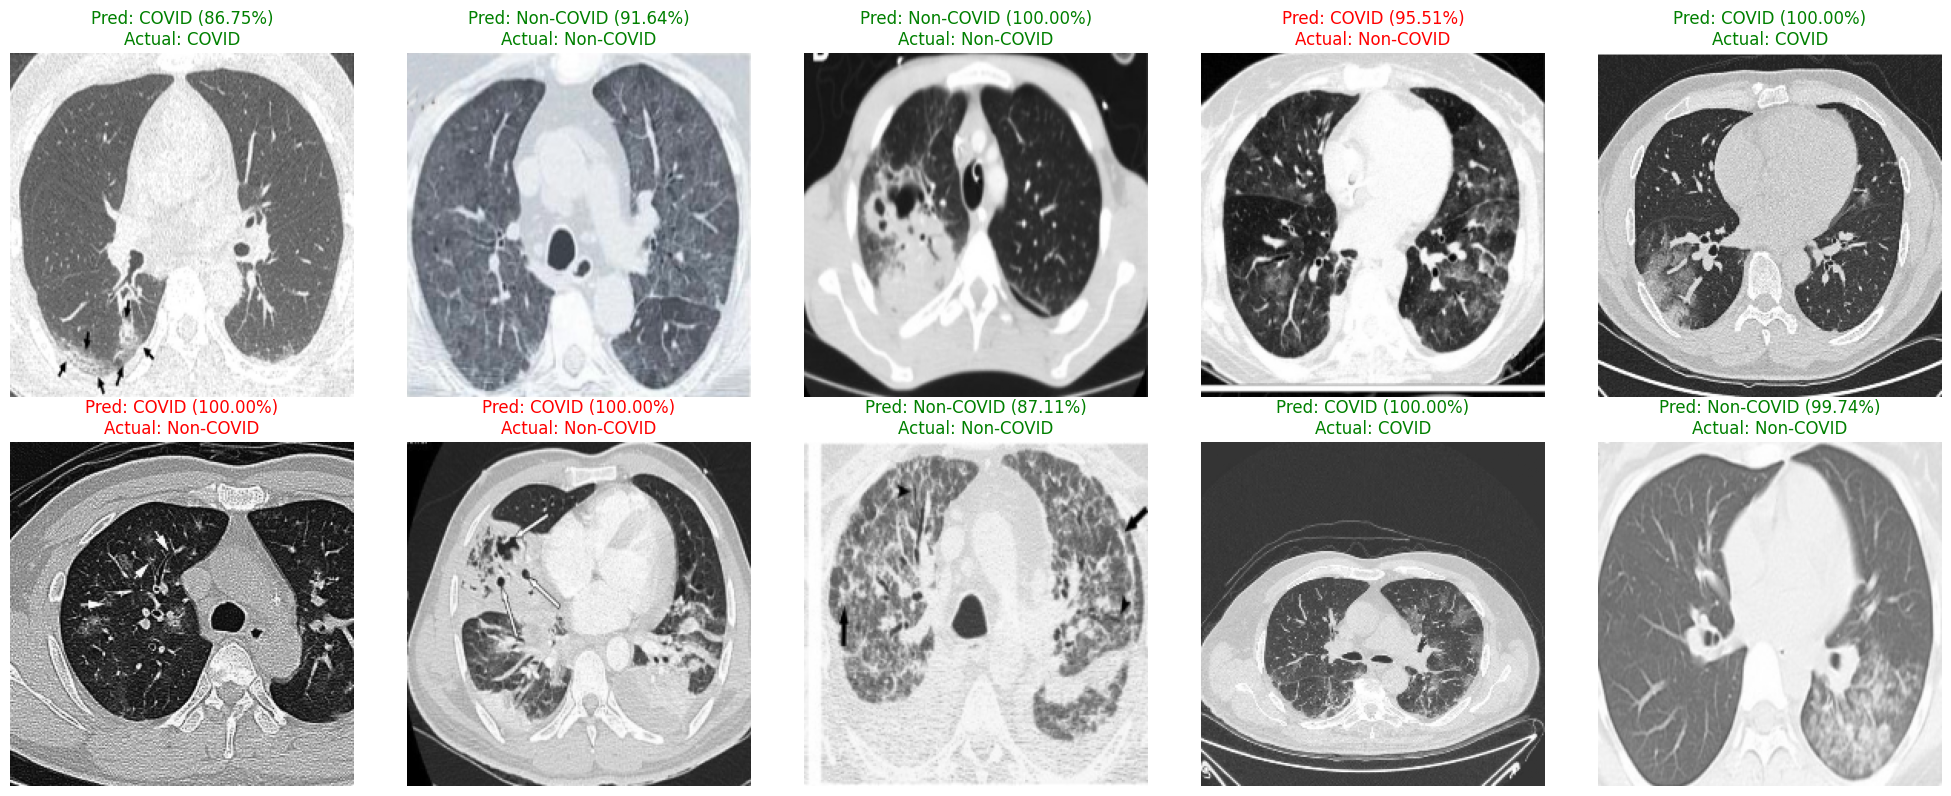

In [29]:
import matplotlib.pyplot as plt
import numpy as np

predit = modell.predict(X_test, batch_size=32)
predictions = predit[0:10]
actuals = y_test[0:10]  

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for index, (probability, actual, ax) in enumerate(zip(predictions, actuals, axes)):
    predicted_label = np.argmax(probability)
    actual_label = np.argmax(actual)
    prob_covid = probability[1] * 100
    prob_noncovid = (1 - probability[1]) * 100
    
  
    color = 'green' if predicted_label == actual_label else 'red'
    
    if prob_covid > 50:
        title = f'COVID ({prob_covid:.2f}%)'
    else:
        title = f'Non-COVID ({prob_noncovid:.2f}%)'
    
    ax.imshow(X_test[index])
    ax.set_title(f'Pred: {title}\nActual: {"COVID" if actual_label == 1 else "Non-COVID"}', color=color)
    ax.axis('off')

plt.tight_layout()
plt.show()


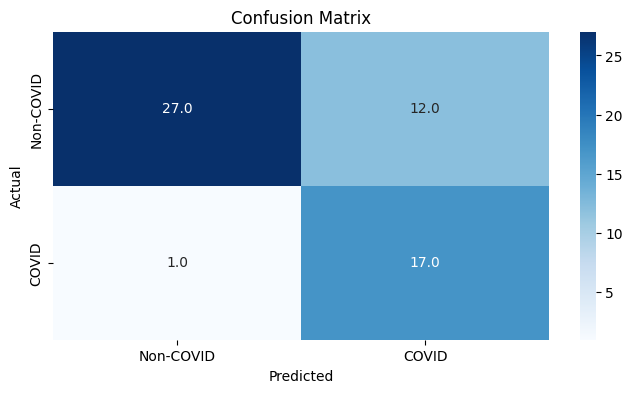

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc,accuracy_score
import seaborn as sns

predd_y=np.argmax(predit,axis=1)
truee_y=np.argmax(y_test,axis=1)
confusion_mat = confusion_matrix(truee_y,predd_y)
plt.figure(figsize=(8,4))
sns.heatmap(confusion_mat, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [31]:
accuarcy=accuracy_score(truee_y,predd_y)
print(f'accuracy of the model: {accuarcy * 100:.2f}')

accuracy of the model: 77.19


In [32]:
rpt=classification_report(truee_y,predd_y,target_names=['Non_COVID','COVID'])
print(rpt)


              precision    recall  f1-score   support

   Non_COVID       0.96      0.69      0.81        39
       COVID       0.59      0.94      0.72        18

    accuracy                           0.77        57
   macro avg       0.78      0.82      0.76        57
weighted avg       0.84      0.77      0.78        57



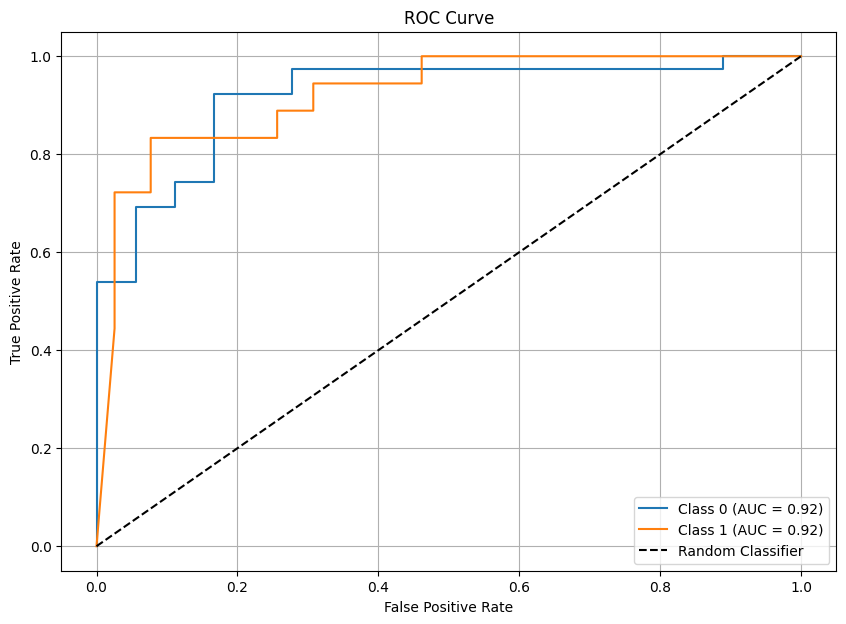

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


predicted_probabilities = predit  
true_labels = y_test  

plt.figure(figsize=(10, 7))
for i in range(true_labels.shape[1]):  
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


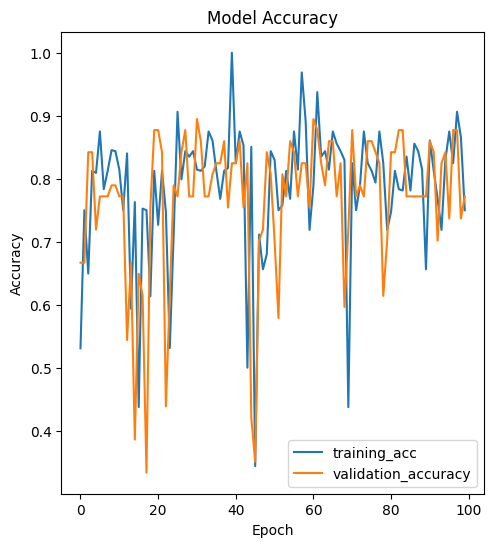

In [36]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(historyy.history['accuracy'], label='training_acc')
plt.plot(historyy.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

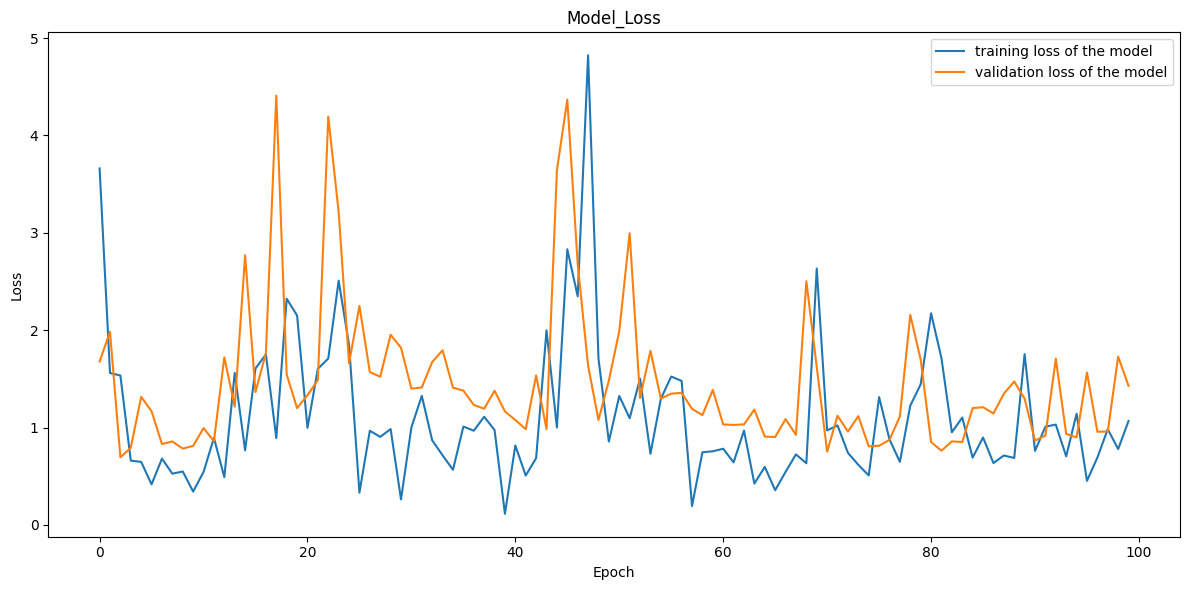

In [39]:
plt.figure(figsize=(12,6))
plt.plot(historyy.history['loss'], label='training loss of the model')
plt.plot(historyy.history['val_loss'], label='validation loss of the model')
plt.title('Model_Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()